# Assignment No 6


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [38]:
# loading the dataset
data = pd.read_csv("Iris.csv")

In [39]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:ylabel='SepalLengthCm'>

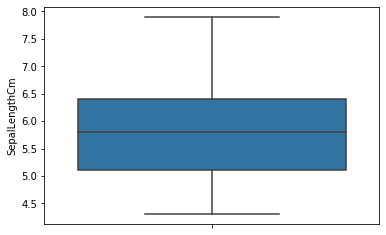

In [41]:
sns.boxplot(data = data, y = "SepalLengthCm")

<AxesSubplot:ylabel='PetalLengthCm'>

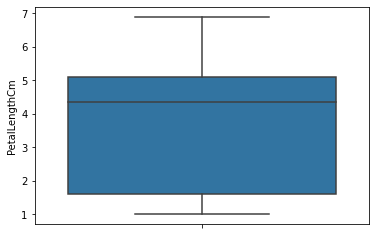

In [42]:
sns.boxplot(data = data, y = "PetalLengthCm")

<AxesSubplot:ylabel='PetalWidthCm'>

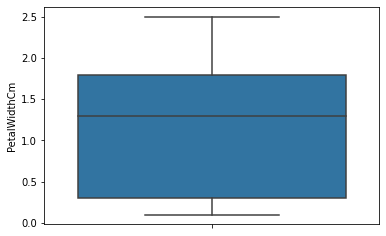

In [43]:
sns.boxplot(data = data, y = "PetalWidthCm")

<AxesSubplot:ylabel='SepalWidthCm'>

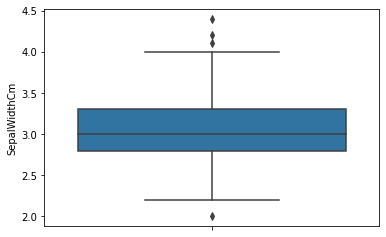

In [44]:
sns.boxplot(data = data, y = "SepalWidthCm")

In [45]:
#removing outliers from SepalWidthCm

Q1=data["SepalWidthCm"].quantile(0.25)
Q3=data["SepalWidthCm"].quantile(0.75)
IQR=Q3-Q1
data=data[~((data["SepalWidthCm"]<(Q1-1.5*IQR)) | (data["SepalWidthCm"]>(Q3+1.5*IQR)))]
# data["SepalWidthCm"]=data["SepalWidthCm"][~((data["SepalWidthCm"]<(Q1-1.5*IQR)) | (data["SepalWidthCm"]>(Q3+1.5*IQR)))]

In [46]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:ylabel='SepalWidthCm'>

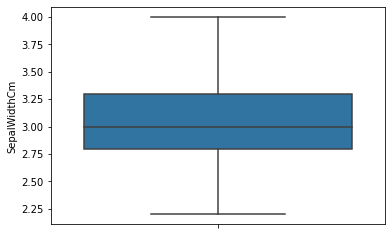

In [47]:
sns.boxplot(data = data, y = "SepalWidthCm")

In [48]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [49]:
x = data.iloc[:, [1,2,3,4]].values
y = data.iloc[:, 5].values

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [53]:
model.fit(xtrain, ytrain)

GaussianNB()

In [55]:
ypred = model.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype='<U15')

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]])

<AxesSubplot:>

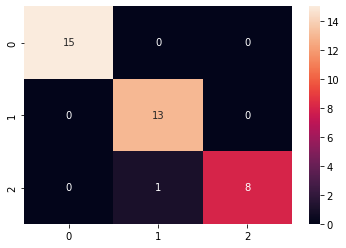

In [58]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [59]:
tp = cm[0][0]
fn = cm[0][1] + cm[0][2]
fp = cm[1][0] + cm[2][0]
tn = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]

print(tp, fn, fp, tn)

15 0 0 22
